In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('mango_quality.csv')

In [3]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


# EDA

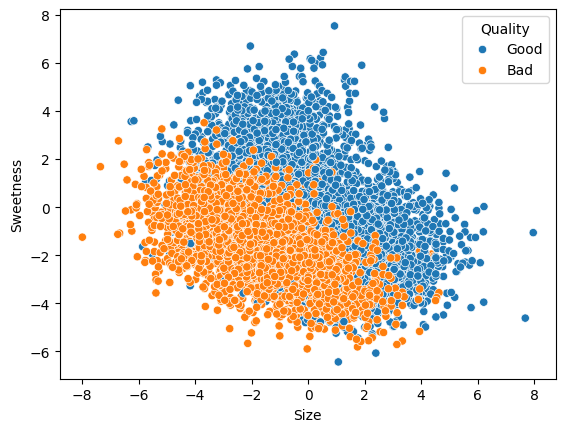

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = df["Size"], y = df["Sweetness"], hue = df["Quality"])
plt.show()

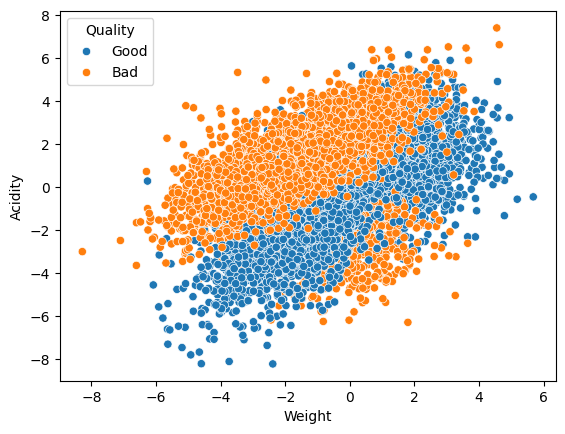

In [5]:
sns.scatterplot(x = df["Weight"], y = df["Acidity"], hue = df["Quality"])
plt.show()

In [6]:
y=df.pop('Quality')

In [7]:
X=df
X.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000


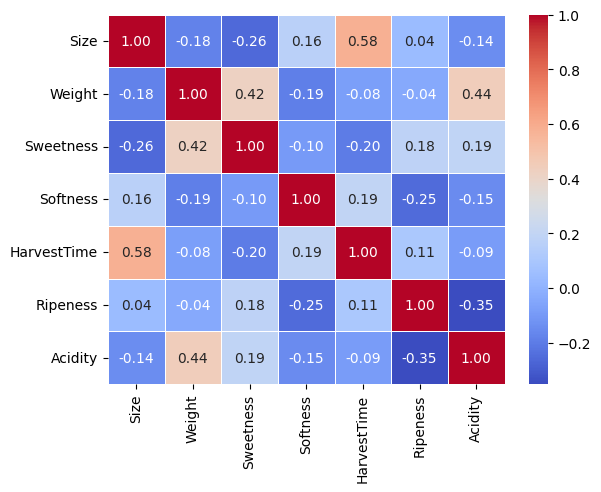

In [8]:
# Draw the heatmap
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [9]:
X.shape

(8000, 7)

In [10]:
y.shape
#applyig lable encodre to quality(target coulmn)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0])

# splitting data into train_test

In [12]:
#train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6400, 7) (6400,) (1600, 7) (1600,)


In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
lr.score(x_test,y_test)

0.88875

Accuracy: 0.88875


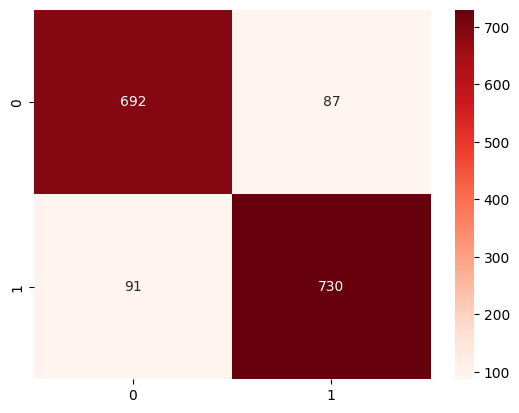

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       779
           1       0.89      0.89      0.89       821

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, lr.predict(x_test))
print("Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,lr.predict(x_test)))

In [17]:
from sklearn.svm import SVC
svc=SVC(max_iter=100000)
params={'kernel':['poly','rbf'],
        'gamma':['scale','auto'],
       'C':[1,0.1,0.01,0.05,0.5]}
g_svc=GridSearchCV(svc,params,return_train_score=True,verbose=3,cv=3)
g_svc.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=1, gamma=scale, kernel=poly;, score=(train=0.954, test=0.953) total time=   0.0s
[CV 2/3] END C=1, gamma=scale, kernel=poly;, score=(train=0.954, test=0.954) total time=   0.0s
[CV 3/3] END C=1, gamma=scale, kernel=poly;, score=(train=0.957, test=0.944) total time=   0.0s
[CV 1/3] END C=1, gamma=scale, kernel=rbf;, score=(train=0.983, test=0.981) total time=   0.0s
[CV 2/3] END C=1, gamma=scale, kernel=rbf;, score=(train=0.983, test=0.982) total time=   0.0s
[CV 3/3] END C=1, gamma=scale, kernel=rbf;, score=(train=0.985, test=0.977) total time=   0.0s


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/3] END C=1, gamma=auto, kernel=poly;, score=(train=0.960, test=0.956) total time=   0.2s


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/3] END C=1, gamma=auto, kernel=poly;, score=(train=0.960, test=0.951) total time=   0.2s


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/3] END C=1, gamma=auto, kernel=poly;, score=(train=0.961, test=0.949) total time=   0.2s
[CV 1/3] END C=1, gamma=auto, kernel=rbf;, score=(train=0.990, test=0.982) total time=   0.2s
[CV 2/3] END C=1, gamma=auto, kernel=rbf;, score=(train=0.991, test=0.984) total time=   0.2s
[CV 3/3] END C=1, gamma=auto, kernel=rbf;, score=(train=0.992, test=0.982) total time=   0.1s
[CV 1/3] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.940, test=0.945) total time=   0.0s
[CV 2/3] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.941, test=0.942) total time=   0.0s
[CV 3/3] END C=0.1, gamma=scale, kernel=poly;, score=(train=0.944, test=0.931) total time=   0.0s
[CV 1/3] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.973, test=0.973) total time=   0.2s
[CV 2/3] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.974, test=0.975) total time=   0.2s
[CV 3/3] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.975, test=0.973) total time=   0.2s
[CV 1/3] END C=0.1, gamma=auto, kernel

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/3] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.961, test=0.955) total time=   0.1s


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/3] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.959, test=0.953) total time=   0.1s


C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/3] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.963, test=0.949) total time=   0.1s
[CV 1/3] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.988, test=0.982) total time=   0.2s
[CV 2/3] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.989, test=0.983) total time=   0.2s
[CV 3/3] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.990, test=0.981) total time=   0.2s


GridSearchCV(cv=3, estimator=SVC(max_iter=100000),
             param_grid={'C': [1, 0.1, 0.01, 0.05, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True, verbose=3)

In [18]:
g_svc.score(x_test,y_test)

0.980625

Accuracy: 0.980625


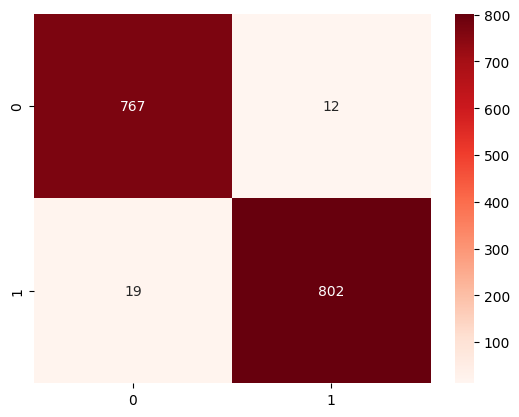

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       779
           1       0.99      0.98      0.98       821

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, g_svc.predict(x_test))
print("Accuracy:", accuracy)

import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_test, g_svc.predict(x_test))
sns.heatmap(cf_matrix, annot=True, fmt='.4g', cmap='Reds')
plt.show()
print(classification_report(y_test,g_svc.predict(x_test)))